## Feature Engineering 

#### Equipo # 5 

##### Integrantes y matriculas 

* Isaac M
* Marcos 
* Jesus 

In [55]:
# importacion librerias 
# Libraries import 
%load_ext autoreload
%autoreload 2
import sys, os
from pathlib import Path

sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import random


from watermark.dataset import DataHandler
from watermark.features import Utilities

from keras.utils import pad_sequences  # Para ajustar secuencias de entrada a una longitud específica

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dh = DataHandler()
data_dict = dh.load_data(Path("../data/raw"), "emothaw_data.pkl")

2025-02-02 16:39:02.170 | INFO     | watermark.dataset:load_data:51 - Loading data from ..\data\raw\emothaw_data.pkl
2025-02-02 16:39:02.331 | SUCCESS  | watermark.dataset:load_data:56 - Data loaded successfully from ..\data\raw\emothaw_data.pkl


In [3]:
# Obtener datos de la variable X de todas las tareas para guardarlos en un diccionario.
x_data = {} # Diccionario para guardar los datos de las variables de X separados por tarea
y_data = {} # Diccionario para guardar los datos de las variables de Y separados por tarea
p_data = {} # Diccionario para guardar los datos de las variables de presión separados por tarea
for key in data_dict.keys():
    # Las llaves del diccionario separan los datos por tarea
    # Los valores del diccionario son listas de series de pandas
    x_data[key] = [serie.X for serie in data_dict[key]] # Obtener series de variable X a partir de DF
    y_data[key] = [serie.Y for serie in data_dict[key]] # Obtener series de variable Y a partir de DF
    p_data[key] = [serie.Pressure for serie in data_dict[key]] # Obtener series de variable Pressure a partir de DF
# Los diccionarios x_data, y_data y p_data contienen los datos de las variables X, Y y Pressure respectivamente separados por tarea
# Cada valor de los diccionarios es una lista de series de pandas que contienen los datos de cada usuario de la tarea correspondiente


In [4]:
# Guardamos los datos de las variables X en una lista para cada tarea para su manejo posterior
list_data_x = [x_data['t1_data'], x_data['t2_data'], x_data['t3_data'], 
         x_data['t4_data'], x_data['t5_data'], x_data['t6_data'],
         x_data['t7_data']]

In [5]:
# Hacemos lo mismo para las variables Y
list_data_y = [y_data['t1_data'], y_data['t2_data'], y_data['t3_data'],
         y_data['t4_data'], y_data['t5_data'], y_data['t6_data'],
         y_data['t7_data']]

In [6]:
# Hacemos lo mismo para las variables de presión
p_list_data = [p_data['t1_data'], p_data['t2_data'], p_data['t3_data'],
         p_data['t4_data'], p_data['t5_data'], p_data['t6_data'],
         p_data['t7_data']]

In [7]:
# Creamos listas para guardar los datos de las señales de cada usuario
signals_x_data = []
signals_y_data = []
signals_p_data = []

# Iteramos sobre las listas de datos de cada tarea para obtener las señales de cada usuario
for data in list_data_x: 
    signals_x_data+=data

for data in list_data_y:
    signals_y_data+=data

for data in p_list_data:
    signals_p_data+=data

# Imprimimos el número de señales de cada variable
print("Número de señales de la variable X:", len(signals_x_data))
print("Número de señales de la variable Y:", len(signals_y_data))
print("Número de señales de la variable Pressure:", len(signals_p_data))

Número de señales de la variable X: 902
Número de señales de la variable Y: 902
Número de señales de la variable Pressure: 902


In [8]:
strides=[600, 1500, 1300, 100, 50, 1200, 900] # Estos valores se seleccionaron para mantener una proporción similar de muestras de cada una de las tareas
limit_len = 1500  # Longitud límite de las secuencias utilizadas para el entrenamiento de las redes
# Obtenemos las secuencias extendidas de las variables X, Y y Pressure
sequences_list_x = dh.get_extended_data(list_data_x, strides, limit_len)
sequences_list_y = dh.get_extended_data(list_data_y, strides, limit_len)
sequences_list_p = dh.get_extended_data(p_list_data, strides, limit_len)


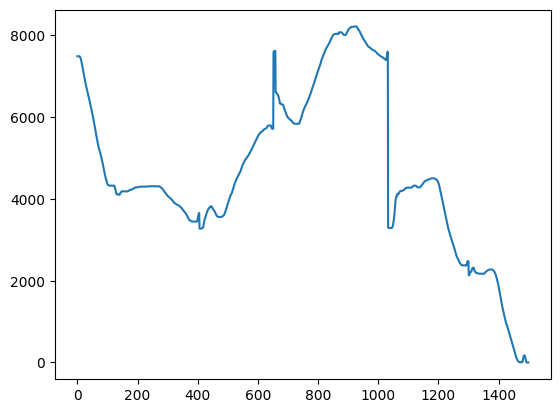

In [9]:
plt.plot(sequences_list_x[0][1]);   # Graficamos una secuencia de la variable X

Aplicar padding a todas las secuencias<br>
Dado que no todas las secuencias tienen la misma longitud, es necesario aplicar padding con ceros para estandarizarlas a una longitud uniforme para que puedan ser procesadas por las redes neuronales.

In [10]:
x_data =[]
y_data = []
p_data = []

for i, x in enumerate(sequences_list_x):
    x_data.append(pad_sequences(x, maxlen=limit_len, padding='post', dtype='float64', truncating='post'))

for i, y in enumerate(sequences_list_y):
    y_data.append(pad_sequences(y, maxlen=limit_len, padding='post', dtype='float64', truncating='post'))

for i, p in enumerate(sequences_list_p):
    p_data.append(pad_sequences(p, maxlen=limit_len, padding='post', dtype='float64', truncating='post'))



In [11]:
# Combinar las secuencias de todas las tareas en un solo arreglo
x_tasks_data = np.vstack(x_data) # Apilar secuencias de las tareas verticalmente+
y_tasks_data = np.vstack(y_data) # Apilar secuencias de las tareas verticalmente
p_tasks_data = np.vstack(p_data) # Apilar secuencias de las tareas verticalmente

print(f'Dimensión del arreglo que contiene las secuencias de todas las tareas: {x_tasks_data.shape}')
print(f'Dimensión del arreglo que contiene las secuencias de todas las tareas: {y_tasks_data.shape}')
print(f'Dimensión del arreglo que contiene las secuencias de todas las tareas: {p_tasks_data.shape}')

Dimensión del arreglo que contiene las secuencias de todas las tareas: (2177, 1500)
Dimensión del arreglo que contiene las secuencias de todas las tareas: (2177, 1500)
Dimensión del arreglo que contiene las secuencias de todas las tareas: (2177, 1500)


In [12]:
util = Utilities()

In [28]:
signs_x_wavelet = np.array([util.sign2wavelet(firma) for firma in x_tasks_data])
signs_y_wavelet = np.array([util.sign2wavelet(firma) for firma in y_tasks_data])

In [44]:
# Concatenar características X e Y
firmas_wavelet = np.hstack([signs_x_wavelet, signs_y_wavelet])

print("Forma de las características extraídas:", firmas_wavelet.shape)

Forma de las características extraídas: (2177, 36)


In [ ]:
dates_list = util.dates_generator(100)
print(dates_list)
dates_hashes = {date:util.hashear_fecha(date) for date in dates_list}

fechas_lista = list(dates_hashes.items())

print("Ejemplo de fechas generadas y sus hashes:")
for i in range(3):
    print(f"Fecha: {fechas_lista[i][0]}, Hash: {fechas_lista[i][1][:5]}...")  # Muestra los primeros valores del hash

['2018/02/06 16:23:39', '2013/11/15 18:00:37', '2016/11/20 21:30:17', '2006/03/28 03:52:09', '2018/11/29 11:57:28', '2017/12/19 10:35:00', '1997/01/30 06:52:22', '2012/05/25 02:42:11', '2013/06/16 13:07:35', '2004/11/24 05:03:54', '2008/08/29 20:56:00', '2012/06/10 09:00:37', '2001/04/28 05:21:37', '2021/10/13 15:18:38', '2014/09/10 03:38:35', '2008/09/01 11:22:50', '2018/07/04 09:51:37', '1995/03/06 12:12:58', '2015/04/09 13:52:12', '2003/07/08 00:32:39', '2012/04/22 05:37:30', '2016/09/12 10:16:00', '1995/10/31 07:47:56', '2024/07/10 07:34:05', '2006/07/30 16:58:52', '2022/01/06 05:09:26', '2004/11/11 11:55:55', '2007/01/01 03:23:40', '2019/11/05 02:14:01', '2001/08/05 06:46:04', '2007/02/19 10:44:52', '2016/12/27 21:17:51', '2013/08/13 01:39:29', '2001/07/29 18:06:35', '2005/08/28 18:25:33', '2003/12/17 10:03:52', '2008/06/15 21:15:09', '2019/04/29 16:53:02', '2004/07/28 18:05:15', '2014/11/28 14:04:51', '2017/07/30 19:12:14', '2021/01/16 18:09:02', '2002/01/22 19:57:43', '2010/12/2

In [49]:
num_firmas = firmas_wavelet.shape[0]
print(num_firmas)

2177


In [52]:
fechas_asignadas = random.choices(fechas_lista, k=num_firmas)
hashes_entrenamiento = np.array([hash for _, hash in fechas_asignadas])
print("Forma de los hashes de entrenamiento:", hashes_entrenamiento.shape)  # Debe ser (2177, 32)

Forma de los hashes de entrenamiento: (2177, 32)


In [ ]:
input_dim = firmas_wavelet.shape[1]  # Número de características extraídas
hash_dim = hashes_entrenamiento.shape[1]  # 32 valores del hash

# Definir la red neuronal generadora
inputs = keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation="relu")(inputs)
encoded = layers.Dense(64, activation="relu")(encoded)
encoded = layers.Dense(hash_dim, activation="sigmoid")(encoded)  # 32 valores de salida

modelo_generador = keras.Model(inputs, encoded)
modelo_generador.compile(optimizer="adam", loss="mse")

# Entrenamiento con múltiples fechas
modelo_generador.fit(firmas_wavelet, hashes_entrenamiento, epochs=200, batch_size=16, verbose=1)


Epoch 1/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21151.3867
Epoch 2/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21328.2031
Epoch 3/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21226.8320
Epoch 4/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21153.4355
Epoch 5/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21280.6895
Epoch 6/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21235.1641
Epoch 7/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21112.5508
Epoch 8/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21151.1660
Epoch 9/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21207.7812
Epoch 10/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21248.0586
Epoch 11/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21191.1914
Epoch 12/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21115.8477
Epoch 13/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21187.9805
Epoch 14/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss